In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
from collections import defaultdict
import math

def read_fasta(file_path):
    sequences=[]
    current_sequence=[]
    with open(file_path,"r") as file:
        for line in file:
            if line.startswith(">"):
                if current_sequence:
                    sequences.append(''.join(current_sequence))
                    current_sequence=[]
            else:
                current_sequence.append(line.strip())
        if current_sequence:
            sequences.append(''.join(current_sequence))
    return sequences

def calculate_mean_composition(sequence):
    aa_frequencies=defaultdict(float)
    num_sequences = len(sequence)
    for seq in sequence:
        seq_length=len(seq)
        seq_aa_counts=defaultdict(int)

        for aa in "ACDEFGHIKLMNPQRSTVWY":
            seq_aa_counts[aa]=seq.count(aa)
        for aa, count in seq_aa_counts.items():
            aa_frequencies[aa] += count / seq_length
    aa_composition = {aa: (freq / num_sequences) for aa, freq in aa_frequencies.items()}
    sorted_aa_composition = dict(sorted(aa_composition.items(), key=lambda item: item[1], reverse=True))
    return sorted_aa_composition
    
def calculate_mean_ss(ss_sequence):
    ss_frequencies=defaultdict(float)
    num_sequences = len(ss_sequence)
    for seq in ss_sequence:
        seq_length=len(seq)
        seq_ss_counts=defaultdict(int)

        for ss in "CHE":
            seq_ss_counts[ss]=seq.count(ss)
        for ss, count in seq_ss_counts.items():
            ss_frequencies[ss] += count / seq_length
    ss_composition = {ss: (freq / num_sequences) for ss, freq in ss_frequencies.items()}
    sorted_ss_composition = dict(sorted(ss_composition.items(), key=lambda item: item[1], reverse=True))
    return sorted_ss_composition

def aa_types(aa_composition):
    type = {
        "polar": 0,
        "non-polar": 0,
        "aromatic": 0,
        "positive_charged":0,
        "negative_charged":0,
        "all_charged":0,
        "uncharged":0
    }

    for aa in aa_composition:
        if aa in "STNQ":
            type["polar"]+=aa_composition[aa]
        elif aa in "AVILMPGC":
            type["non-polar"]+=aa_composition[aa]
        elif aa in "FYW":
            type["aromatic"]+=aa_composition[aa]
        elif aa in "HK":
            type["positive_charged"]+=aa_composition[aa]
        elif aa in "RDE":
            type["negative_charged"]+=aa_composition[aa]
        if aa in "HKRDE":
            type["all_charged"]+=aa_composition[aa]
        else:
            type["uncharged"]+=aa_composition[aa]
    sorted_type_composition = dict(sorted(type.items(), key=lambda item: item[1], reverse=True))
    return sorted_type_composition


In [11]:
print("Prediction of secondary structure using s4pred")
print("Mean frequency of DIBS secondary strcucures",calculate_mean_ss(read_fasta("formatted_clustered_DIBS_ss.fasta")))
print("Mean frequency of MFIB secondary strcucures",calculate_mean_ss(read_fasta("formatted_clustered_MFIB_ss.fasta")))
print("Mean frequency of FuzDB secondary strcucures",calculate_mean_ss(read_fasta("formatted_clustered_fuzdb_ss.fasta")))
print("Mean frequency of Disprot D-O secondary strcucures",calculate_mean_ss(read_fasta("formatted_clustered_disprot_DO_ss.fasta")))
print("Mean frequency of Disprot O-D secondary strcucures",calculate_mean_ss(read_fasta("formatted_clustered_disprot_OD_ss.fasta")))
print("Mean frequency of MobiDB D-O secondary strcucures",calculate_mean_ss(read_fasta("formatted_clustered_mobidb_DO_ss.fasta")))
print("Mean frequency of MobiDB D-D secondary strcucures",calculate_mean_ss(read_fasta("formatted_clustered_mobidb_DD_ss.fasta")))


Prediction of secondary structure using s4pred
Mean frequency of DIBS secondary strcucures {'C': 0.786493296747822, 'H': 0.1911663818303857, 'E': 0.022340321421792354}
Mean frequency of MFIB secondary strcucures {'H': 0.5448572567717416, 'C': 0.3677586766036591, 'E': 0.08738406662459933}
Mean frequency of FuzDB secondary strcucures {'C': 0.6176872380653448, 'H': 0.28841353140929427, 'E': 0.09389923052536066}
Mean frequency of Disprot D-O secondary strcucures {'C': 0.7228731536650754, 'H': 0.2443466552182263, 'E': 0.03278019111669883}
Mean frequency of Disprot O-D secondary strcucures {'C': 0.7785317248037279, 'H': 0.16897233363783065, 'E': 0.05249594155844156}
Mean frequency of MobiDB D-O secondary strcucures {'C': 0.7749651821295389, 'H': 0.18517652882654606, 'E': 0.03985828904391741}
Mean frequency of MobiDB D-D secondary strcucures {'C': 0.8502746772592851, 'H': 0.12704225800099933, 'E': 0.022683064739716315}


In [12]:
print("Mean frequency of DIBS compositions",calculate_mean_composition(read_fasta("cdhit_DIBS.fasta")))
print("Mean frequency of MFIB composition",calculate_mean_composition(read_fasta("cdhit_MFIB.fasta")))
print("Mean frequency of FuzDB composition",calculate_mean_composition(read_fasta("cdhit_fuzdb.fasta")))
print("Mean frequency of Disprot D-O composition",calculate_mean_composition(read_fasta("cdhit_disprot_do.fasta")))
print("Mean frequency of Disprot O-D composition",calculate_mean_composition(read_fasta("cdhit_disprot_od.fasta")))
print("Mean frequency of MobiDB D-O composition",calculate_mean_composition(read_fasta("cdhit_mobidb_do.fasta")))
print("Mean frequency of MobiDB D-D composition",calculate_mean_composition(read_fasta("cdhit_mobidb_dd.fasta")))

Mean frequency of DIBS compositions {'S': 0.09194930491640543, 'L': 0.08521956808062561, 'E': 0.08209122372549452, 'P': 0.07598622894926821, 'A': 0.07187387179573608, 'K': 0.07072316010130796, 'D': 0.06590265818883527, 'R': 0.06417051085099912, 'G': 0.05905247843855716, 'T': 0.053488314291803514, 'Q': 0.04457845797974321, 'V': 0.044067644568642345, 'I': 0.041688569245319135, 'N': 0.03670279828664718, 'F': 0.029431544025152103, 'Y': 0.027624778902112818, 'M': 0.02014613981795419, 'H': 0.01766756424936641, 'W': 0.009726652674434526, 'C': 0.007357610928711147}
Mean frequency of MFIB composition {'L': 0.10604481471847717, 'E': 0.08614539560214388, 'K': 0.07594364131503568, 'A': 0.07540225261029533, 'R': 0.0678316593611285, 'S': 0.06724427780911926, 'V': 0.06168835094818749, 'G': 0.05600089578371488, 'D': 0.054130531775516036, 'Q': 0.05371213433855753, 'I': 0.05106577051339441, 'T': 0.05065090078394208, 'N': 0.04307665224064452, 'P': 0.031564882237399686, 'H': 0.026206534563159533, 'M': 0.0

In [13]:
print("Mean frequency of DIBS compositions",aa_types(calculate_mean_composition(read_fasta("cdhit_DIBS.fasta"))))
print("Mean frequency of MFIB composition",aa_types(calculate_mean_composition(read_fasta("cdhit_MFIB.fasta"))))
print("Mean frequency of FuzDB composition",aa_types(calculate_mean_composition(read_fasta("cdhit_fuzdb.fasta"))))
print("Mean frequency of Disprot D-O composition",aa_types(calculate_mean_composition(read_fasta("cdhit_disprot_do.fasta"))))
print("Mean frequency of Disprot O-D composition",aa_types(calculate_mean_composition(read_fasta("cdhit_disprot_od.fasta"))))
print("Mean frequency of MobiDB D-O composition",aa_types(calculate_mean_composition(read_fasta("cdhit_mobidb_do.fasta"))))
print("Mean frequency of MobiDB D-D composition",aa_types(calculate_mean_composition(read_fasta("cdhit_mobidb_dd.fasta"))))

Mean frequency of DIBS compositions {'uncharged': 0.6988939629011126, 'non-polar': 0.40539211182481394, 'all_charged': 0.30055511711600325, 'polar': 0.22671887547459935, 'negative_charged': 0.2121643927653289, 'positive_charged': 0.08839072435067437, 'aromatic': 0.06678297560169945}
Mean frequency of MFIB composition {'uncharged': 0.6897422373830159, 'non-polar': 0.41733346442386937, 'all_charged': 0.3102577626169836, 'polar': 0.2146839651722634, 'negative_charged': 0.20810758673878843, 'positive_charged': 0.10215017587819522, 'aromatic': 0.05772480778688306}
Mean frequency of FuzDB composition {'uncharged': 0.7295624877592668, 'non-polar': 0.4379603078359178, 'all_charged': 0.2704084023730954, 'polar': 0.22381709004159414, 'negative_charged': 0.1815670538857494, 'positive_charged': 0.08884134848734601, 'aromatic': 0.06778508988175504}
Mean frequency of Disprot D-O composition {'uncharged': 0.686595248289414, 'non-polar': 0.404361854252387, 'all_charged': 0.31330574180959647, 'negative

In [14]:
DIBS_metapredict_scores=pd.read_csv("DIBS_reduced_disorder_scores_sum.csv")
DIBS_scores_array=DIBS_metapredict_scores["metapredict_scores"]
MFIB_metapredict_scores=pd.read_csv("MFIB_reduced_disorder_scores_sum.csv")
MFIB_scores_array=MFIB_metapredict_scores["metapredict_scores"]
fuzdb_metapredict_scores=pd.read_csv("fuzdb_reduced_disorder_scores_sum.csv")
fuzdb_scores_array=fuzdb_metapredict_scores["metapredict_scores"]
DIBS_pLDDT=pd.read_csv("DIBS_reduced_pLDDT_scores_sum.csv")
DIBS_pLDDT_array=DIBS_pLDDT["metapredict_scores"]
MFIB_pLDDT=pd.read_csv("MFIB_reduced_pLDDT_scores_sum.csv")
MFIB_pLDDT_array=MFIB_pLDDT["metapredict_scores"]
fuzdb_pLDDT=pd.read_csv("fuzdb_reduced_pLDDT_scores_sum.csv")
fuzdb_pLDDT_array=fuzdb_pLDDT["metapredict_scores"]
disprot_DO_metapredict_scores=pd.read_csv("disprot_DO_reduced_disorder_scores_sum.csv")
disprot_DO_scores_array=disprot_DO_metapredict_scores["metapredict_scores"]
disprot_OD_metapredict_scores=pd.read_csv("disprot_Od_reduced_disorder_scores_sum.csv")
disprot_OD_scores_array=disprot_OD_metapredict_scores["metapredict_scores"]
disprot_DO_plddt=pd.read_csv("disprot_DO_reduced_pLDDT_scores_sum.csv")
disprot_DO_plddt_array=disprot_DO_plddt["metapredict_scores"]
disprot_OD_plddt=pd.read_csv("disprot_OD_reduced_pLDDT_scores_sum.csv")
disprot_OD_plddt_array=disprot_OD_plddt["metapredict_scores"]
mobidb_dd_metapredict_scores=pd.read_csv("mobidb_DD_reduced_disorder_scores_sum.csv")
mobidb_dd_scores_array=mobidb_dd_metapredict_scores["metapredict_scores"]
mobidb_do_metapredict_scores=pd.read_csv("mobidb_DO_reduced_disorder_scores_sum.csv")
mobidb_do_scores_array=mobidb_do_metapredict_scores["metapredict_scores"]
mobidb_dd_plddt=pd.read_csv("mobidb_DD_reduced_pLDDT_scores_sum.csv")
mobidb_dd_plddt_array=mobidb_dd_plddt["metapredict_scores"]
mobidb_do_plddt=pd.read_csv("mobidb_DO_reduced_pLDDT_scores_sum.csv")
mobidb_do_plddt_array=mobidb_do_plddt["metapredict_scores"]
print("Disorder scores and AlphFold pLDDT values predicted using metapredict")

Disorder scores and AlphFold pLDDT values predicted using metapredict


In [15]:
print("Mean of disprot Disorder-Order metapredict scores:",disprot_DO_scores_array.mean(),"±",disprot_DO_scores_array.std())
print("Mean of disprot Order-Disorder metapredict scores:",disprot_OD_scores_array.mean(),"±",disprot_OD_scores_array.std())
print("Mean of DIBS metapredict scores:",DIBS_scores_array.mean(),"±",DIBS_scores_array.std())
print("Mean of MFIB metapredict scores:",MFIB_scores_array.mean(),"±",MFIB_scores_array.std())
print("Mean of fuzdb metapredict scores:",fuzdb_scores_array.mean(),"±",fuzdb_scores_array.std())
print("Mean of fuzdb pLDDT scores:",fuzdb_pLDDT_array.mean(),"±",fuzdb_pLDDT_array.std())
print("Mean of mobidb Disorder-Disorder metapredict scores:",mobidb_dd_scores_array.mean(),"±",mobidb_dd_scores_array.std())
print("Mean of mobidb Disorder-Order metapredict scores:",mobidb_do_scores_array.mean(),"±",mobidb_do_scores_array.std())

Mean of disprot Disorder-Order metapredict scores: 0.6175647517035939 ± 0.2148401994535519
Mean of disprot Order-Disorder metapredict scores: 0.6494282049437131 ± 0.21975500361864075
Mean of DIBS metapredict scores: 0.6559302096151176 ± 0.19273819094347608
Mean of MFIB metapredict scores: 0.22725675688877822 ± 0.13182945188816905
Mean of fuzdb metapredict scores: 0.41119325321408706 ± 0.2288901594532424
Mean of fuzdb pLDDT scores: 71.64617289823951 ± 12.019279027119929
Mean of mobidb Disorder-Disorder metapredict scores: 0.7233920857063204 ± 0.18990768334910957
Mean of mobidb Disorder-Order metapredict scores: 0.6206783646580748 ± 0.2349863994720209


In [16]:
print("Mean of disprot Disorder-Order pLDDT scores:",disprot_DO_plddt_array.mean(),"±",disprot_DO_plddt_array.std())
print("Mean of disprot Order-Disorder pLDDT scores:",disprot_OD_plddt_array.mean(),"±",disprot_OD_plddt_array.std())
print("Mean of DIBS plDDT scores:",DIBS_pLDDT_array.mean(),"±",DIBS_pLDDT_array.std())
print("Mean of MFIB pLDDT scores:",MFIB_pLDDT_array.mean(),"±",MFIB_pLDDT_array.std())
print("Mean of fuzdb pLDDT scores:",fuzdb_pLDDT_array.mean(),"±",fuzdb_pLDDT_array.std())
print("Mean of mobidb Disorder-Disorder pLDDT scores:",mobidb_dd_plddt_array.mean(),"±",mobidb_dd_plddt_array.std())
print("Mean of mobidb Disorder-Order pLDDT scores:",mobidb_do_plddt_array.mean(),"±",mobidb_do_plddt_array.std())

Mean of disprot Disorder-Order pLDDT scores: 68.82796184396027 ± 9.946906971528136
Mean of disprot Order-Disorder pLDDT scores: 68.05487720340936 ± 9.955647349210624
Mean of DIBS plDDT scores: 67.64693301936113 ± 8.404798959735881
Mean of MFIB pLDDT scores: 84.65532766945616 ± 6.9459710236313965
Mean of fuzdb pLDDT scores: 71.64617289823951 ± 12.019279027119929
Mean of mobidb Disorder-Disorder pLDDT scores: 64.5059406180815 ± 8.461755325558023
Mean of mobidb Disorder-Order pLDDT scores: 68.25501955584022 ± 10.153785336622324


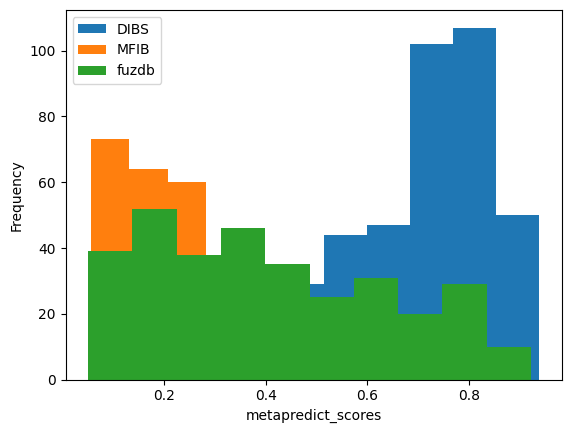

In [17]:
plt.hist(DIBS_scores_array, label="DIBS");
plt.hist(MFIB_scores_array, label="MFIB");
plt.hist(fuzdb_scores_array, label="fuzdb");
plt.xlabel("metapredict_scores")
plt.ylabel("Frequency");
plt.legend();
plt.show();

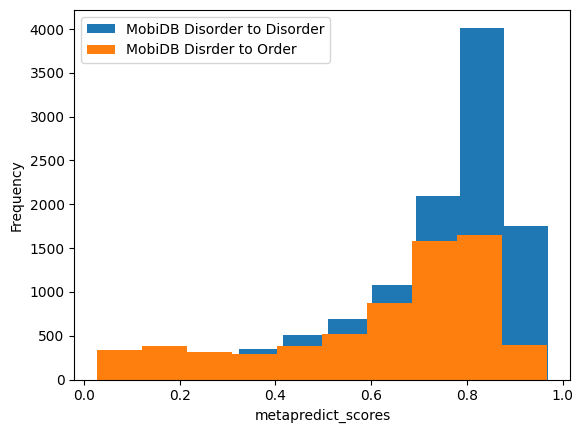

In [18]:
plt.hist(mobidb_dd_scores_array, label="MobiDB Disorder to Disorder");
plt.hist(mobidb_do_scores_array, label="MobiDB Disrder to Order");
plt.xlabel("metapredict_scores")
plt.ylabel("Frequency");
plt.legend();
plt.show();

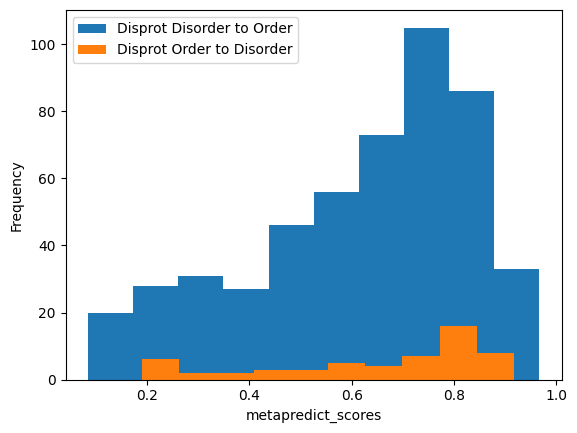

In [19]:
plt.hist(disprot_DO_scores_array,label="Disprot Disorder to Order");
plt.hist(disprot_OD_scores_array, label="Disprot Order to Disorder");
plt.xlabel("metapredict_scores")
plt.ylabel("Frequency");
plt.legend();
plt.show();

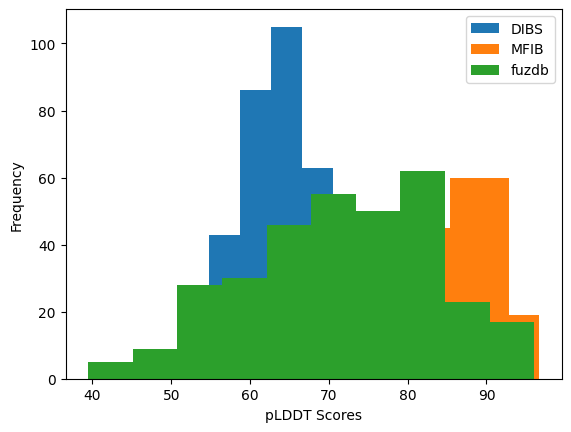

In [20]:
plt.hist(DIBS_pLDDT_array, label="DIBS");
plt.hist(MFIB_pLDDT_array, label="MFIB");
plt.hist(fuzdb_pLDDT_array, label="fuzdb");
plt.xlabel("pLDDT Scores")
plt.ylabel("Frequency");
plt.legend();
plt.show();

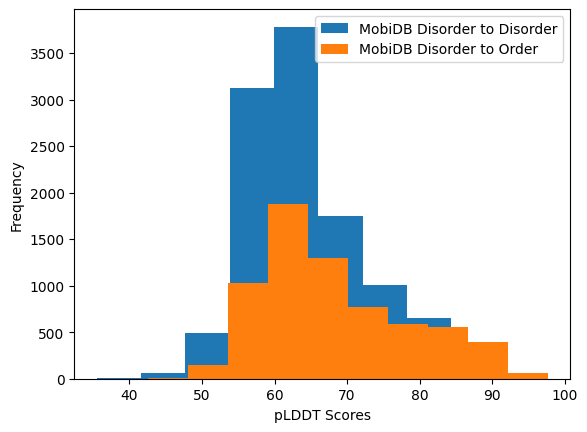

In [21]:
plt.hist(mobidb_dd_plddt_array, label="MobiDB Disorder to Disorder");
plt.hist(mobidb_do_plddt_array, label="MobiDB Disorder to Order");
plt.xlabel("pLDDT Scores")
plt.ylabel("Frequency");
plt.legend();
plt.show();

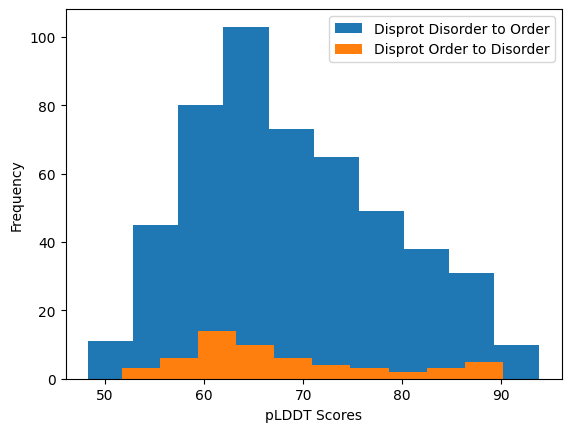

In [22]:
plt.hist(disprot_DO_plddt_array,label="Disprot Disorder to Order");
plt.hist(disprot_OD_plddt_array, label="Disprot Order to Disorder");
plt.xlabel("pLDDT Scores")
plt.ylabel("Frequency");
plt.legend();
plt.show();

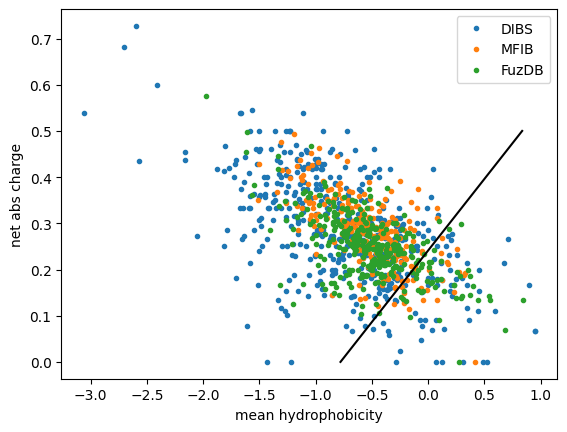

In [23]:
from quantiprot.utils.io import load_fasta_file
from quantiprot.utils.feature import Feature, FeatureSet
from quantiprot.utils.sequence import compact
from quantiprot.metrics.aaindex import get_aa2charge, get_aa2hydropathy
from quantiprot.metrics.basic import average, average_absolute

from matplotlib import pyplot as plt
disprot_do_seq = load_fasta_file("cdhit_disprot_DO.fasta")
disprot_od_seq = load_fasta_file("cdhit_disprot_OD.fasta")
mobidb_dd_seq=load_fasta_file("cdhit_mobidb_DD.fasta")
mobidb_do_seq=load_fasta_file("cdhit_mobidb_DO.fasta")
dibs_seq=load_fasta_file("cdhit_DIBS.fasta")
mfib_seq=load_fasta_file("cdhit_MFIB.fasta")
fuzdb_seq=load_fasta_file("cdhit_fuzdb.fasta")


# Non-standard letters in Disprot assigned neutral charge and hydropathy:
net_abs_charge = Feature(get_aa2charge(default=0)).then(average_absolute)
mean_hydropathy = Feature(get_aa2hydropathy(default=0)).then(average)

uversky_fs = FeatureSet("uversky")
uversky_fs.add(mean_hydropathy, name="mean_hydropathy")
uversky_fs.add(net_abs_charge, name="net_abs_charge")

disprot_do_uversky_seq = uversky_fs(disprot_do_seq)
disprot_od_uversky_seq = uversky_fs(disprot_od_seq)
mobidb_dd_uversky_seq=uversky_fs(mobidb_dd_seq)
mobidb_do_uversky_seq=uversky_fs(mobidb_do_seq)
dibs_uversky_seq=uversky_fs(dibs_seq)
mfib_uversky_seq=uversky_fs(mfib_seq)
fuzdb_uversky_seq=uversky_fs(fuzdb_seq)

# First approach to get hydrophobicity/charge pairs
#disprot_do_data_x = disprot_do_uversky_seq.columns(feature="mean_hydropathy")[0]
#disprot_do_data_y = disprot_do_uversky_seq.columns(feature="net_abs_charge")[0]
#plt.plot(disprot_do_data_x, disprot_do_data_y,'.', label="Disprot D-O")

# Second approach to get hydrophobicity/charge pairs
dibs_data = compact(dibs_uversky_seq).columns()
plt.plot(dibs_data[0], dibs_data[1],'.', label="DIBS")
mfib_data = compact(mfib_uversky_seq).columns()
plt.plot(mfib_data[0], mfib_data[1],'.', label="MFIB")
fuzdb_data = compact(fuzdb_uversky_seq).columns()
plt.plot(fuzdb_data[0], fuzdb_data[1],'.', label="FuzDB")

plt.plot([-0.78, 0.835], [0.0, 0.5],'k')
plt.xlabel("mean hydrophobicity")
plt.ylabel("net abs charge")
plt.legend()
plt.show()

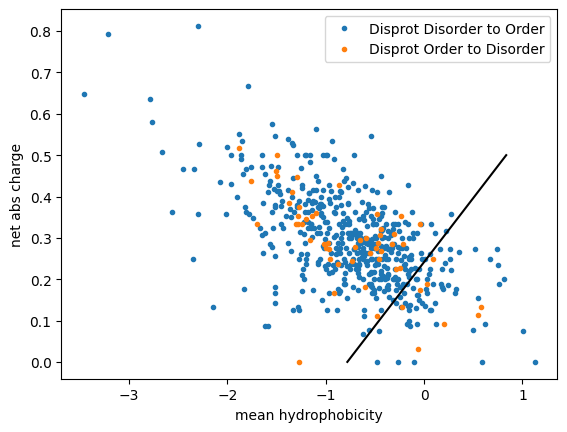

In [24]:
disprot_do_data = compact(disprot_do_uversky_seq).columns()
plt.plot(disprot_do_data[0], disprot_do_data[1],'.', label="Disprot Disorder to Order")
disprot_od_data = compact(disprot_od_uversky_seq).columns()
plt.plot(disprot_od_data[0], disprot_od_data[1],'.', label="Disprot Order to Disorder")

plt.plot([-0.78, 0.835], [0.0, 0.5],'k')
plt.xlabel("mean hydrophobicity")
plt.ylabel("net abs charge")
plt.legend()
plt.show()

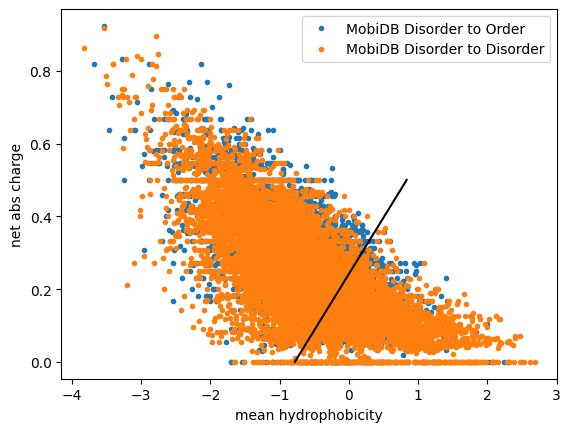

In [25]:
mobidb_do_data = compact(mobidb_do_uversky_seq).columns()
plt.plot(mobidb_do_data[0], mobidb_do_data[1],'.', label="MobiDB Disorder to Order")
mobidb_dd_data = compact(mobidb_dd_uversky_seq).columns()
plt.plot(mobidb_dd_data[0], mobidb_dd_data[1],'.', label="MobiDB Disorder to Disorder")

plt.plot([-0.78, 0.835], [0.0, 0.5],'k')
plt.xlabel("mean hydrophobicity")
plt.ylabel("net abs charge")
plt.legend()
plt.show()

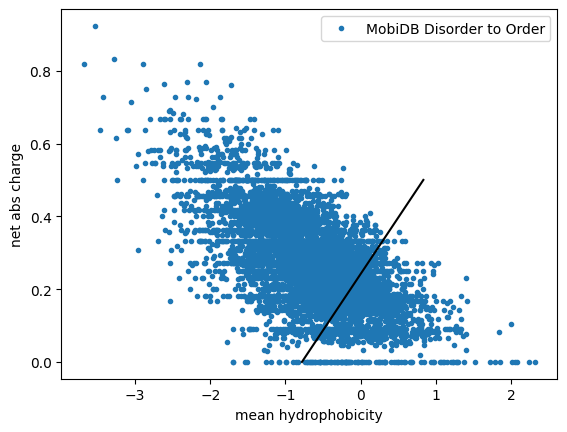

In [26]:
mobidb_do_data = compact(mobidb_do_uversky_seq).columns()
plt.plot(mobidb_do_data[0], mobidb_do_data[1],'.', label="MobiDB Disorder to Order")
plt.plot([-0.78, 0.835], [0.0, 0.5],'k')
plt.xlabel("mean hydrophobicity")
plt.ylabel("net abs charge")
plt.legend()
plt.show()

In [28]:
def count_cbrs(filepath):
    cbrs={}
    with open(filepath,"r") as file:
        for res in file:
            res=res.strip()
            if res in cbrs:
                cbrs[res]+=1
            else:
                cbrs[res]=1
        total_counts=sum(cbrs.values())
        cbrs={res:count/total_counts for res,count in cbrs.items()}
        sorted_cbrs = dict(sorted(cbrs.items(), key=lambda item: item[1], reverse=True))
        return sorted_cbrs
print("Frequency of compositionally biased regions of the sequences in the databases:")
print("DIBS:",count_cbrs("cdhit_DIBS_cpbrs.txt"))
print("MFIB",count_cbrs("cdhit_MFIB_cpbrs.txt"))
print("FuzDB",count_cbrs("cdhit_fuzdb_cpbrs.txt"))
print("Disprot disorder to order",count_cbrs("cdhit_disprot_do_cpbrs.txt"))
print("Disprot order to disorder",count_cbrs("cdhit_disprot_od_cpbrs.txt"))
print("MobiDB disorder disorder",count_cbrs("cdhit_mobidb_dd_cpbrs.txt"))
print("MobiDB disorder to order",count_cbrs("cdhit_mobidb_do_cpbrs.txt"))

Frequency of compositionally biased regions of the sequences in the databases:
DIBS: {'P': 0.2009132420091324, 'S': 0.1506849315068493, 'E': 0.1278538812785388, 'K': 0.0867579908675799, 'Q': 0.0684931506849315, 'G': 0.0639269406392694, 'R': 0.0502283105022831, 'D': 0.045662100456621, 'C': 0.0273972602739726, 'N': 0.0273972602739726, 'A': 0.0228310502283105, 'T': 0.0228310502283105, 'SP': 0.0182648401826484, 'X': 0.0091324200913242, 'SER': 0.0045662100456621, 'RP': 0.0045662100456621, 'SE': 0.0045662100456621, 'KE': 0.0045662100456621, 'GN': 0.0045662100456621, 'GS': 0.0045662100456621, 'ED': 0.0045662100456621, 'PR': 0.0045662100456621, 'QA': 0.0045662100456621, 'W': 0.0045662100456621, 'QW': 0.0045662100456621, 'SD': 0.0045662100456621, 'DK': 0.0045662100456621, 'PD': 0.0045662100456621, 'EP': 0.0045662100456621, 'CG': 0.0045662100456621, 'V': 0.0045662100456621}
MFIB {'K': 0.14127423822714683, 'E': 0.12188365650969529, 'R': 0.12188365650969529, 'Q': 0.10526315789473684, 'H': 0.072022